<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_04_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

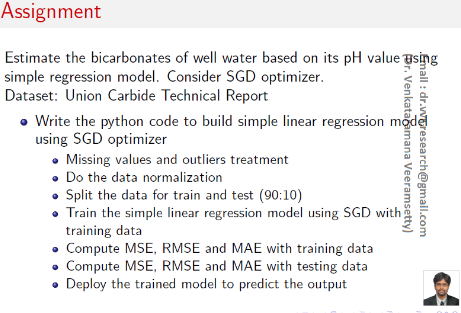

**X- PH value, Y - Carbides present**

In [30]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/unioncarbide.xls')
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [31]:
len(df)

34

**MISSING VALUES**

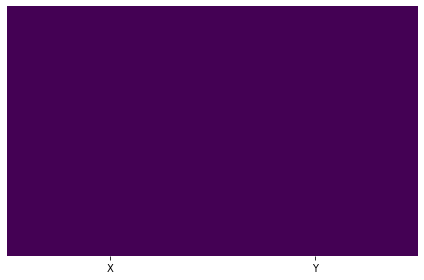

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

**Hence There are no missing values**

**OUTLIERS**

In [33]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
#print(z)

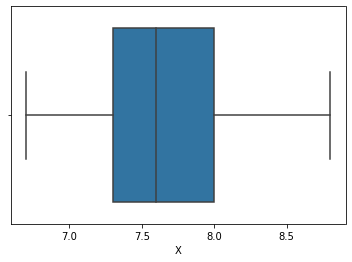

In [34]:
sns.boxplot(x=df['X'])

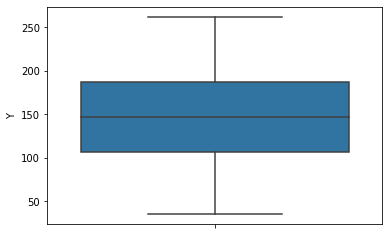

In [35]:
sns.boxplot(y=df['Y'])

In [36]:
for i in df:
    q = df[i].quantile(0.99)
    df[df[i] < q]
    q_low = df[i].quantile(0.01)
    q_hi  = df[i].quantile(0.99)

    df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
df_filtered.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [37]:
print(len(df))
print(len(df_filtered))
if(len(df)==len(df_filtered)):
  print('There are no outliers')
else:
  print('There are outliers. So consider filtered data')
  df = df_filtered.copy()

34
32
There are outliers. So consider filtered data


In [38]:
len(df)

32

**Normalization**

In [42]:
def min_max_scaling(df):
  df_norm = df.copy()
  #apply min max scaling
  #ct=0
  for column in df_norm.columns:
    df_norm[column]=(df_norm[column]-df_norm[column].min())/(df_norm[column].max()-df_norm[column].min())
  return df_norm

df_norm = min_max_scaling(df)
df_norm.head()

,X,Y
0,0.428571,0.644970
1,0.190476,0.745562
2,0.714286,0.751479
3,0.380952,0.828402
4,0.333333,0.727811


**Splitting of Dataset**

In [44]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_norm.X, df_norm.Y, test_size = 0.10, random_state = 42)

In [46]:
x_train.head()

8     0.190476
9     0.380952
32    0.190476
27    0.333333
13    0.523810
Name: X, dtype: float64

In [47]:
y_train.head()

8     0.556213
9     0.840237
32    0.792899
27    0.455621
13    0.337278
Name: Y, dtype: float64

**TRAINING - SGD ALGO**

In [80]:
import sympy as sym
from sympy import *
import random
#step 1 : initialize model params
mi=1 #model parameters
ci=-1
n=0.1 #learning rate
epochs = 700
iter =1
#ns = df.shape[0]
ns = len(x_train)

#step 2: start iteration and update iter
#iter = iter+1
for iter in range(1,epochs+1):
    #step 3: track samples
    #sample =1
    print("ITERATION : {}".format(iter))
    for i,j in zip(x_train,y_train):
      xa = i
      ya = j
      print("-> SAMPLE {} : ".format(sample+1)+"x = {}".format(xa)+" y = {}".format(ya))
      #print("sample {}".format(x)+" {}".format(y))
      #step 4 calculate gradient wrto each model param
      
      #declare the variables that you will be using in the error function
      x=sym.Symbol('x')
      y=sym.Symbol('y')
      m=sym.Symbol('m')
      c=sym.Symbol('c')
      E=(0.5)*(y-m*x-c)**2  #ERROR FUNCTION

      deltaE_m=sym.diff(E,m) #differentiation wrto m
      deltaE_c=sym.diff(E,c)  #differentiate wrto c
      print(deltaE_m)
      print(deltaE_c)

      deltaE_m = deltaE_m.subs(m, mi) 
      deltaE_m = deltaE_m.subs(c, ci)
      deltaE_m = deltaE_m.subs(x, xa)
      deltaE_m = deltaE_m.subs(y, ya)  
      deltaE_m = round(deltaE_m,2) 
       
      deltaE_c = deltaE_c.subs(m, mi)
      deltaE_c = deltaE_c.subs(c, ci)
      deltaE_c = deltaE_c.subs(x, xa)
      deltaE_c = deltaE_c.subs(y, ya)
      deltaE_c = round(deltaE_c,2) 

     # print('Obtained Gradient wrto m and c:')
      #print('deltaE_m: ',deltaE_m)
      #print('deltaE_c: ',deltaE_c)

     
      #step 5 : calculate change
      del_m = -n*deltaE_m
      del_c = -n*deltaE_c
      #step 6: update model params
      mi = mi+del_m
      ci = ci+del_c
      print("m: {}".format(mi)+" c = {}".format(ci))
      sample=sample+1
print("---------------------------------------------------------------")
print('Optimal Values')
print('m = {}'.format(mi))
print('c = {}'.format(ci))

#step 4: calculate error


Streaming output truncated to the last 5000 lines.
-> SAMPLE 21723.285714285714 : x = 0.6190476190476188 y = 0.8402366863905325
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
m: -0.311120605468699 c = 0.683862304687501
-> SAMPLE 21724.285714285714 : x = 0.6666666666666663 y = 0.9881656804733728
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
m: -0.277136230468699 c = 0.734838867187501
-> SAMPLE 21725.285714285714 : x = 0.6190476190476188 y = 0.1952662721893491
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
m: -0.300134277343699 c = 0.697827148437501
-> SAMPLE 21726.285714285714 : x = 0.5238095238095235 y = 0.5857988165680473
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
m: -0.298132324218699 c = 0.702807617187502
-> SAMPLE 21727.285714285714 : x = 0.4285714285714282 y = 0.6449704142011834
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
m: -0.295129394531199 c = 0.709838867187502
-> SAMPLE 21728.285714285714 : x = 0.2857142857142855 y = 1.0
-1.0*x*(-c - m*x + y)
1.0*c + 1.0*m*x - 1.0*y
m: -0.

**TRAINING ERROR**

In [81]:
x_train_list = list(x_train) #typecasting tuple to lis
y_train_list = list(y_train)

In [82]:
y_train_pred = []
for i in x_train:
  ycalc = mi*i+ci
  y_train_pred.append(ycalc)
#y_train_pred

In [83]:
MSError_train = []
mse_train_total=0
for i in range(0,len(x_train)):
  mse_train = (y_train_list[i]-y_train_pred[i])
  mse_train_total+=mse_train
  MSError_train.append(mse_train)

print('MSE - TRAINING ERROR obtained:')
#print(MSError_train)
print('Mean square error: ',mse_train_total/(len(x_train)))


MSE - TRAINING ERROR obtained:
Mean square error:  -0.0502563815606010


**MSE, RMSE, MAE - Training data**


In [84]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
mse = math.sqrt(mean_squared_error(y_train, y_train_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_train, y_train_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_train_pred)
print('Mean absolute error', mae)

Root mean square error 0.28326153531597814
Mean square error 0.08023709738956512
Mean absolute error 0.23061379123001696


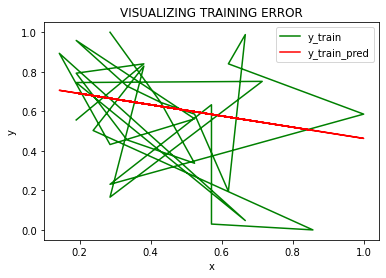

In [85]:
#Plot a line graph
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_train',color='green')
plt.plot(x_train_list,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**TESTING ERROR**

In [86]:
y_test_list = list(y_test)
x_test_list = list(x_test)

In [87]:
y_test_pred = []
for i in x_test:
  ycalc = mi*i+ci
  y_test_pred.append(ycalc)
y_test_pred

[0.746850585937502, 0.503519112723262, 0.611666434151813, 0.544074358258969]

In [88]:
MSError_test = []
mse_test_total=0
for i in range(0,len(x_test)):
  mse_test = (y_test_list[i]-y_test_pred[i])
  mse_test_total+=mse_test
  MSError_test.append(mse_train)

print('MSE - TRAINING ERROR obtained:')
#print(MSError_train)
print('Mean square error: ',mse_test_total/(len(x_test)))


MSE - TRAINING ERROR obtained:
Mean square error:  -0.125196261821141


In [89]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
mse = math.sqrt(mean_squared_error(y_test, y_test_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_test_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_test_pred)
print('Mean absolute error', mae)

Root mean square error 0.3132087484408294
Mean square error 0.09809972009987077
Mean absolute error 0.30878038446680434


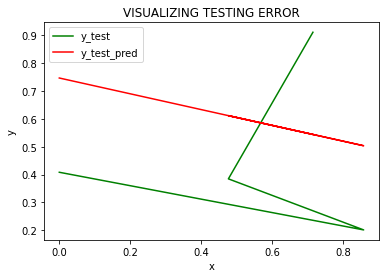

In [90]:
#Plot a line graph
import matplotlib.pyplot as plt
plt.plot(x_test_list,y_test_list,label='y_test',color='green')
plt.plot(x_test_list,y_test_pred,label='y_test_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TESTING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**PREDICT _ DEPLOY**

In [93]:

x_min = df['X'].min()
x_max = df['X'].max()
y_min = df['Y'].min()
y_max = df['Y'].max()
x =x1 = float(input("Enter pH value of well water :"))
x = (x - x_min)/(x_max - x_min)
y = mi*x + ci
y = y*(y_max - y_min) + y_min
print(f"Predicted bicarbonates of well water based on its pH {x1} is : {y}")

Enter pH value of well water :8.9
Predicted bicarbonates of well water based on its pH 8.9 is : 123.956281389519
